**Model 1: Phân nhóm khách hàng với nhiều thuộc tính bằng K-Means sau đó dùng Naive Bayes xây dựng mô hình dự đoán lớp cho khách hàng**

- Dùng K-Means phân nhóm khách hàng

In [ ]:
#Kết nối với Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Tạo dataset từ file csv
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/DS102_CK/Mall_Customers.csv')

In [ ]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
#Tiền xử lý dữ liệu
df=df.drop(['CustomerID'],axis=1)
df['Gender'][df.Gender == 'Male'] =  100
df['Gender'][df.Gender == 'Female'] =  50
df['Gender']=df['Gender'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,100,19,15,39
1,100,21,15,81
2,50,20,16,6
3,50,23,16,77
4,50,31,17,40
...,...,...,...,...
195,50,35,120,79
196,50,45,126,28
197,100,32,126,74
198,100,32,137,18


In [ ]:
#import thư viện
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import plotly.express as px

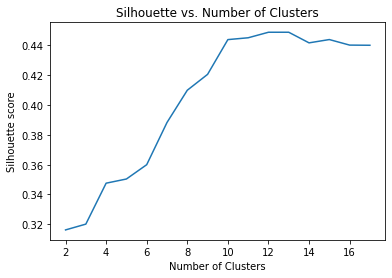

In [ ]:
#Tìm K phù hợp cho thuật toán Kmeans
sil_score=[]
for i in range(2,18):
  kmeans = KMeans(n_clusters=i, init= 'k-means++', random_state=42)
  kmeans.fit(df)
  preds = kmeans.predict(df)
  score = silhouette_score(df, preds, metric='euclidean')
  sil_score.append(score)
plt.plot(range(2,18),sil_score)
plt.title('Silhouette vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette score')
plt.show()

In [ ]:
#Huấn luyện mô hình
kmeans = KMeans(n_clusters=12, init='k-means++', random_state=42)
kmeans.fit(df)
df['label']=kmeans.labels_

In [ ]:
#Trực quan hóa bằng giá trị trung bình các thuộc tính của 12 cụm
polar=df.groupby(by=['label']).mean().reset_index()
polar=pd.melt(polar,id_vars=['label'])
fig4 = px.line_polar(polar, r='value', theta='variable', color='label',
                     line_close=True,height=400,width=700)
fig4.show()

In [ ]:
#Thống kê số điểm dữ liệu trong 12 cụm
df.groupby('label').size().reset_index()

,label,0
0,0,25
1,1,18
2,2,20
3,3,19
4,4,24
5,5,21
6,6,9
7,7,14
8,8,9
9,9,15


In [ ]:
#Trực quan hóa sự phân bố của các điểm dữ liệu vào 12 cụm
pie=df.groupby('label').size().reset_index()
pie.columns=['label','value']
px.pie(pie,values='value',names='label',color='label')

- Dùng Naive Bayes xây dựng mô hình dự đoán lớp cho khách hàng



In [ ]:
#Import các thư viện
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report

In [ ]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,100,19,15,39,8
1,100,21,15,81,6
2,50,20,16,6,10
3,50,23,16,77,7
4,50,31,17,40,10
...,...,...,...,...,...
195,50,35,120,79,5
196,50,45,126,28,9
197,100,32,126,74,1
198,100,32,137,18,2


In [ ]:
#Chia tập dũ liệu X thành train test với tỉ lệ 8:2
X = df.iloc[:, 0:-1].values
Y = df.iloc[:, -1].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, 
                                                    random_state = 42)

In [ ]:
#Huấn luyện mô hình
GNB_classifier = GaussianNB()
GNB_classifier.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

Text(0.5, 114.81999999999996, 'Predicted')

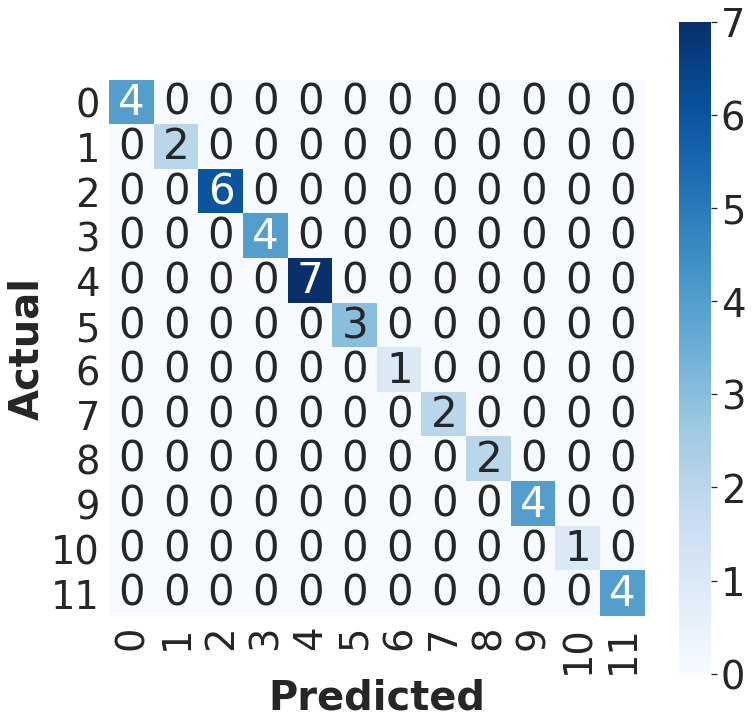

In [ ]:
#In ra confusion matrix
cm = confusion_matrix(Y_test, GNB_classifier.predict(X_test))
plt.figure(figsize=(12, 12))
sns.set(font_scale=3.5)
ax = sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, square=True, fmt = 'g')
ax.set_ylabel('Actual', fontsize=40 ,fontweight = 'bold')
ax.set_xlabel('Predicted', fontsize=40, fontweight = 'bold')

In [ ]:
#Classification report
print(classification_report(Y_test, GNB_classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         4
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         4

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



**Dự đoán một khách hàng thuộc nhóm nào (Cluster 0-11)**

In [ ]:
#@title Nhập các thuộc tính khách hàng { run: "auto" }
Age =  23#@param {type:"integer"}
Gender = "Female" #@param ["Male", "Female"]
Annual_Income =  16#@param {type:"integer"}
Spending_Score =  77#@param {type:"integer"}

#create a object
import numpy as np
if (Gender=='Male'):
  obj=np.array([100, Age, Annual_Income, Spending_Score])
if (Gender=='Female'):
  obj=np.array([50, Age, Annual_Income, Spending_Score])

Message = 'Cluster ' + str(GNB_classifier.predict(obj.reshape(1, -1))[0])

#button 'Predict'
import ipywidgets as widgets
from IPython.display import display
button = widgets.Button(description="Predict")
output = widgets.Output()

def on_button_clicked(b):
  with output:
    print(Message)

button.on_click(on_button_clicked)
display(button, output)

Button(description='Predict', style=ButtonStyle())

Output()